Complete the code in the blocks below. Do not alter blocks that indicate that they should not be changed.

Look for blocks that say "FILL IN THIS SECTION"

FILL IN THIS SECTION

Author(s): Emilio Cardenas, Deautaun Ross, Johan Olvera, Theodore Weller


In this homework we will explore and visualize the value of Bitcoin over a 14 year period. The data file that we will be using is a single "time series"

In [1]:
# Add imports here as necesary
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Do Not Change!

url = 'https://raw.githubusercontent.com/gentry-atkinson/small_text_repo/main/btc.csv'
coin_df = pd.read_csv(url, on_bad_lines='skip')
print(f"Lines read: {len(coin_df)}")
print(coin_df.head(3))

Lines read: 4994
         Date  Open  High  Low  Close  Volume
0  2010-07-18   0.0   0.1  0.1    0.1    80.0
1  2010-07-19   0.1   0.1  0.1    0.1   570.0
2  2010-07-20   0.1   0.1  0.1    0.1   260.0


We are going to start by trying to understand this dataset. Plotting all 14 years of opening prices on the same figure will help us see seasonal changes in the data. You should split up the data by year and the plot each year in the same figure as a line plot (which is usually a good choice for time series data), with the date on the X-axis and the opening price on the Y-axis. PyPlot is an easy choice for this task, but feel free to use any tool you like, as long as your figure is displayed by the code block below. Your figure should be easy to understand, but doesn't need to be perfect. Plot each year in a different color and add a legend to show which year is which.

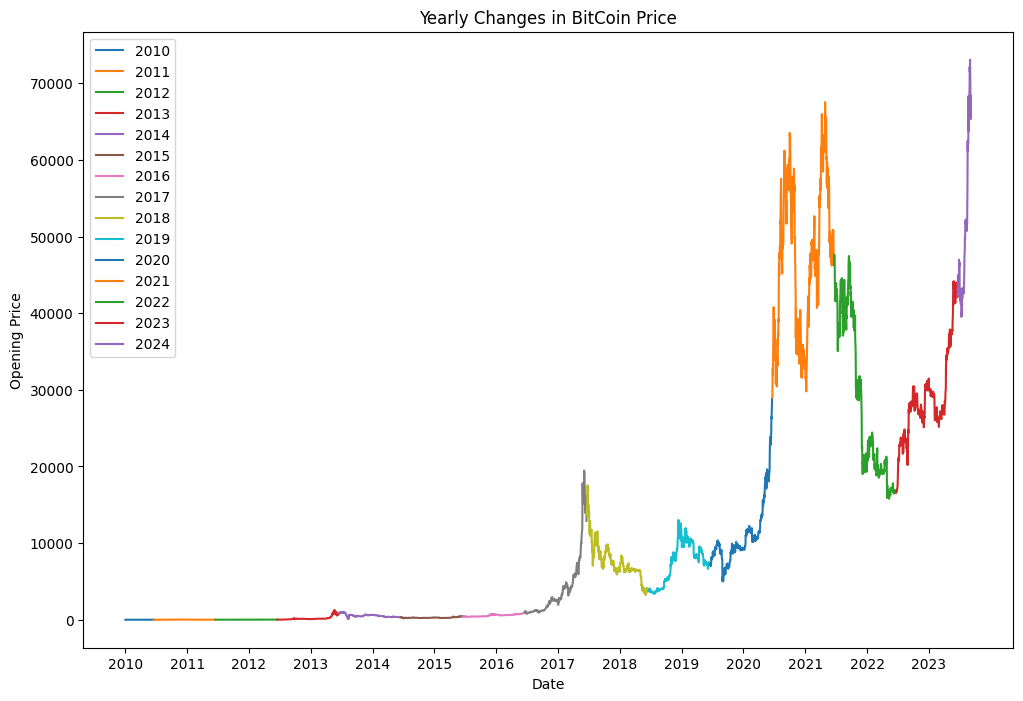

In [3]:
# FILL IN THIS SECTION

plt.figure(figsize=(12, 8))
plt.title("Yearly Changes in BitCoin Price")
# # Generate your plot here.

def changesInBitcoin():
  # Splitting the Date column to extract the year
  coin_df['Year'] = pd.to_datetime(coin_df['Date']).dt.year

  # Grouping by year and plotting each group
  for year, data in coin_df.groupby('Year'):
      plt.plot(data['Date'], data['Open'], label=str(year))

  plt.xlabel('Date')
  plt.ylabel('Opening Price')
  plt.legend()
  plt.xticks(coin_df['Date'][::365], coin_df['Year'][::365])
  plt.show()

changesInBitcoin()



We might also want to judge which year had the biggest "swing" between its high and low waluation. In the code block below generate a figure that shows the overall high price and low price for each year. Plot high prices and low prices in two different colors. Add a legend explaining which is which.

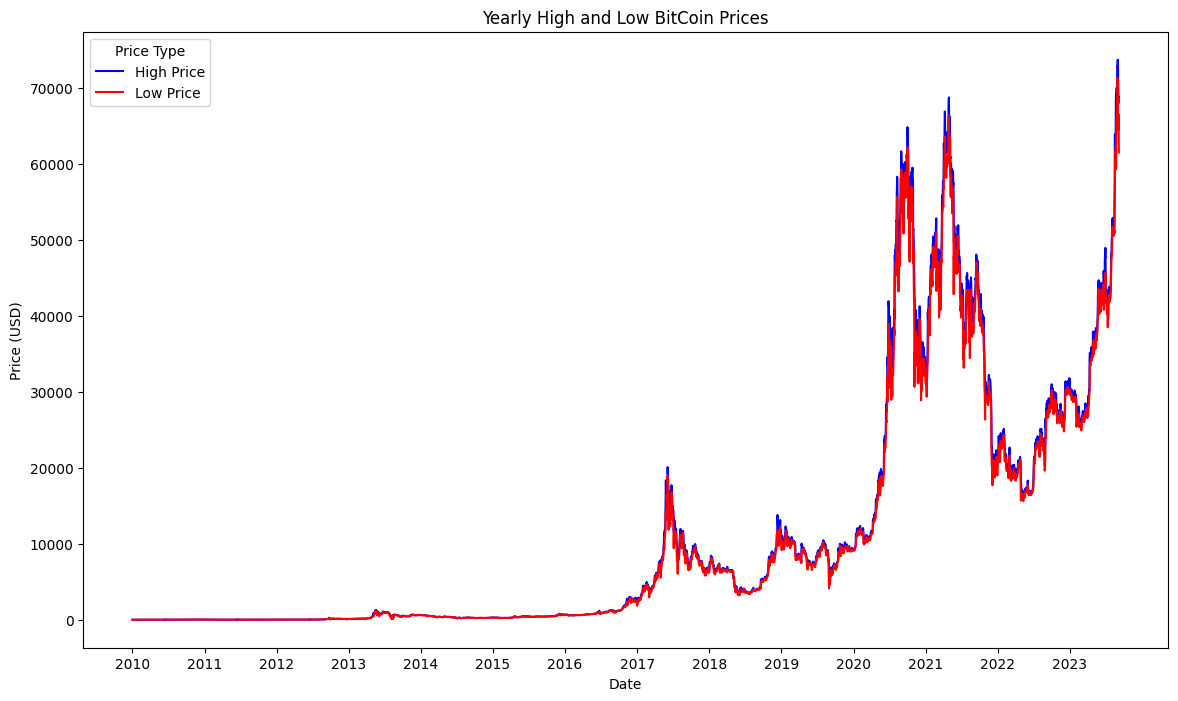

In [4]:
# FILL IN THIS SECTION

plt.figure(figsize=(14, 8))
plt.title("Yearly High and Low BitCoin Prices")

# Unique years in the DataFrame
years = coin_df['Year'].unique()

# Loop through each year and plot the high and low prices
for year in years:
    # Subset the data for the current year
    yearly_data = coin_df[coin_df['Year'] == year]
    # Plotting high prices
    plt.plot(yearly_data['Date'], yearly_data['High'], label=str(year), color='blue')
    # Plotting low prices
    plt.plot(yearly_data['Date'], yearly_data['Low'], label=str(year), color='red')

# Adding legend to the plot
plt.legend(["High Price", "Low Price"], title="Price Type")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.xticks(coin_df['Date'][::365], coin_df['Year'][::365])



plt.show()


It would be nice to know how much bitcoin is being bought and sold. Use **numpy.ployfit** to compute a curve of best fit to the Volume column of the data. Plot your curve over the data. Use a scatter plot for the recorded Volume values and a line plot for your curve

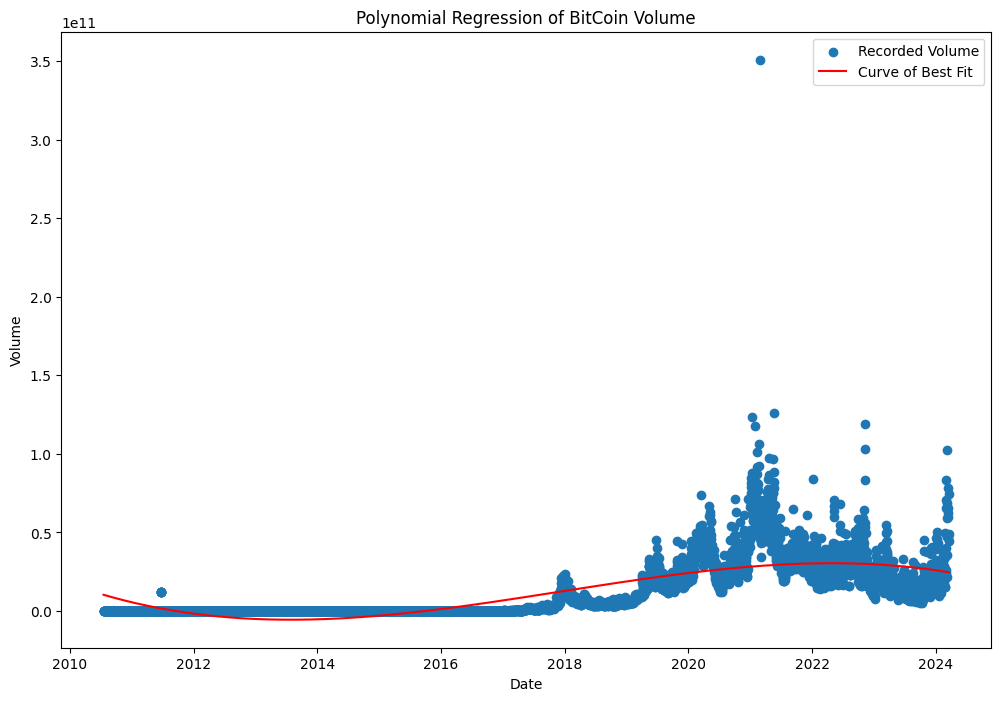

In [12]:
# FILL IN THIS SECTION

plt.figure(figsize=(12,8))
plt.title("Polynomial Regression of BitCoin Volume")
# # Generate your plot here.

import numpy as np

# Extracting Volume data
volume = coin_df['Volume']

# Scatter plot of recorded Volume values
plt.scatter(pd.to_datetime(coin_df['Date']), volume, label='Recorded Volume')

# Computing the curve of best fit
degree = 3  # Choose the degree of the polynomial
coefficients = np.polyfit(pd.to_datetime(coin_df['Date']).astype(int), volume, degree)
curve = np.poly1d(coefficients)

# Plotting the curve of best fit
plt.plot(pd.to_datetime(coin_df['Date']), curve(pd.to_datetime(coin_df['Date']).astype(int)), color='red', label='Curve of Best Fit')

plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()






Our last plot will help us investigate the relationship between trade volume and the change in price over the course of the day. Make a scatter plot with Volume on the X-axis and Change in Price on the Y-Axis. Compute the day's change in price as the Open number for the day minus the Close number.

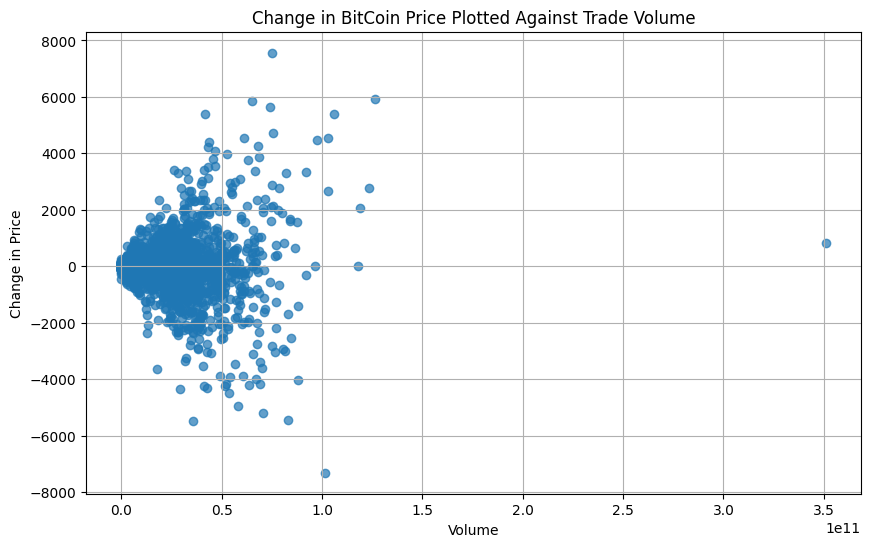

In [ ]:
# FILL IN THIS SECTION

plt.figure(figsize=(10,6))
plt.title("Change in BitCoin Price Plotted Against Trade Volume")
# # Generate your plot here.

# Compute the day's change in price
coin_df['PriceChange'] = coin_df['Open'] - coin_df['Close']

# Plotting Volume vs. Change in Price
plt.scatter(coin_df['Volume'], coin_df['PriceChange'], alpha=0.7)

plt.xlabel('Volume')
plt.ylabel('Change in Price')
plt.grid(True)
plt.show()


FILL IN THIS SECTION

Answer the questions below by editing this text block.

1.  What factors not present in this dataset might be affecting this data?
    - External market factors, regulatory changes, technological advancements, and global economic conditions could all potentially affect Bitcoin prices.

2.  What is one trend you can observe in this data?
    - One trend that can be observed is the overall increase in Bitcoin prices over the years, as shown by the upward trend in the opening prices and the very recent increase in 2024 (almost peaking).

3.  What is a research question that you might explore further using this dataset?
    - One possible research question could be: "How do trading volumes of Bitcoin correlate with its price movements over time?"

4.  Can you observe any outliers in this data?
    - There a data point at 3.5e11 which could be a result of user input error.

5.  According to your polynomial regression, what will the trading volume of BitCoin be on January 1st, 2025?
    - The predicted trading volume of Bitcoin on January 1st, 2025 is approximately 11553684321576.71



In [20]:
from datetime import datetime

polynomial = np.poly1d(coefficients)


# Date of interest
target_date = datetime(2025, 1, 1)

# Convert target date to ordinal
target_date_ordinal = target_date.toordinal()

# Predict volume using the polynomial
predicted_volume = polynomial(target_date_ordinal)

print(f"The predicted trading volume of Bitcoin on January 1st, 2025 is approximately {predicted_volume:.2f}")

The predicted trading volume of Bitcoin on January 1st, 2025 is approximately 11553684321576.71
